In [ ]:
#1. Install necessary modules

In [ ]:
try:
    import tangelo
except ModuleNotFoundError:
    !pip install git+https://github.com/goodchemistryco/Tangelo.git@develop --quiet

# Download the data folder at https://github.com/goodchemistryco/Tangelo-Examples/tree/main/examples/chemistry/data
import os
if not os.path.isdir("data"):
    !sudo apt install git
    !git clone https://github.com/sandbox-quantum/Tangelo-Examples.git
    !mkdir data
    !cp -a Tangelo-Examples/examples/chemistry/data/. ./data/

In [ ]:
!pip install --prefer-binary pyscf==2.3.0

  Using cached pyscf-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.1 kB)
Using cached pyscf-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.2 MB)


In [ ]:
#2. Setting up the molecule
    #Determining Appropriate basis sets
    #Optimize by choosing active orbitals

In [ ]:
from tangelo import SecondQuantizedMolecule

LiH = [('Li', (0, 0, 0)), ('H', (0, 0, 1.5949))]
#specifying the spatial configuration of LiH
#Li and H nuclei separated by 1.5949Å along the z-axis

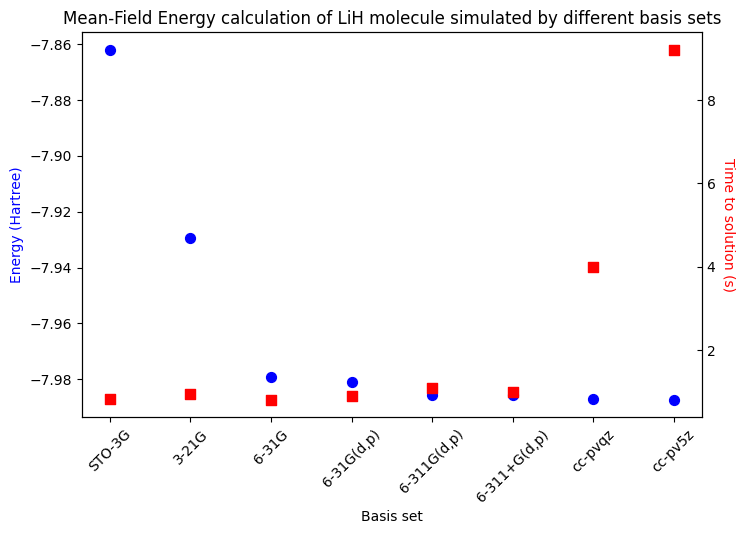

In [ ]:
#Figuring out the most optimal basis sets to use to simulate LiH singlet state
#LiH Ground state case

basis_sets = [
    "STO-3G",       # Simple zeta, minimal basis.
    "3-21G",        # Double zeta.
    "6-31G",        # Double zeta with more Gaussian primitives.
    "6-31G(d,p)",   # Polarization functions (+ 5 d-orbitals for all atoms except H, +3 p-orbitals for H atoms) added.
    "6-311G(d,p)",  # Triple zeta with polarization functions.
    "6-311+G(d,p)", # Triple zeta with polarization functions and diffuse functions.
    "cc-pvqz",      # Quadruple zeta.
    "cc-pv5z"       # Quintuple zeta.
]

import time
import matplotlib.pyplot as plt

mf_energies = list()
mf_times = list()

# Perform a Mean-Field calculation for each basis set.
for bs in basis_sets:

    # Measure execution time.
    start = time.time()
    scan_basis_mol = SecondQuantizedMolecule(LiH, q=0, spin=0, basis=bs)
    end = time.time()

    mf_energies.append(scan_basis_mol.mf_energy)
    mf_times.append(end-start)

# Create the matplotlib figure.
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
plt.title("Mean-Field Energy calculation of LiH molecule simulated by different basis sets")
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy (Hartree)", color="b")
#Hartree unit: unit of energy used in atomic physics/computational chemistry
#represents absolute value of the electric potential energy of an e- in a H atom in its ground state
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
plt.show()

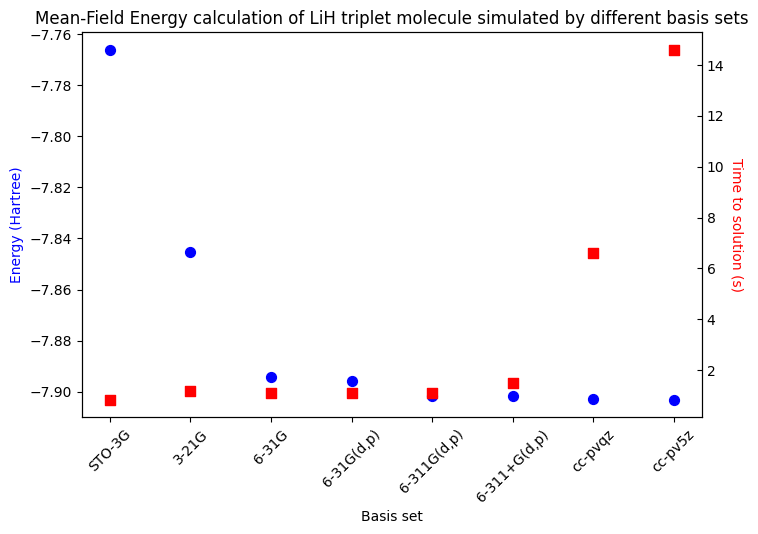

In [ ]:
#Figuring out the most optimal basis sets to use to simulate LiH triplet state
#LiH Excited state case

basis_sets = [
    "STO-3G",       # Simple zeta, minimal basis.
    "3-21G",        # Double zeta.
    "6-31G",        # Double zeta with more Gaussian primitives.
    "6-31G(d,p)",   # Polarization functions (+ 5 d-orbitals for all atoms except H, +3 p-orbitals for H atoms) added.
    "6-311G(d,p)",  # Triple zeta with polarization functions.
    "6-311+G(d,p)", # Triple zeta with polarization functions and diffuse functions.
    "cc-pvqz",      # Quadruple zeta.
    "cc-pv5z"       # Quintuple zeta.
]

import time
import matplotlib.pyplot as plt

mf_energies = list()
mf_times = list()

# Perform a Mean-Field calculation for each basis set.
for bs in basis_sets:

    # Measure execution time.
    start = time.time()
    scan_basis_mol = SecondQuantizedMolecule(LiH, q=0, spin=2, basis=bs) #spin=2 triplet state with two unpaired e-, higher energy
    end = time.time()

    mf_energies.append(scan_basis_mol.mf_energy)
    mf_times.append(end-start)

# Create the matplotlib figure.
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
plt.title("Mean-Field Energy calculation of LiH triplet molecule simulated by different basis sets")
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy (Hartree)", color="b")
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
plt.show()

In [ ]:
#Based on the graph, we will choose 6-311+G(d,p) as our basis sets
#Figuring out which orbitals to choose as our active orbitals

mol_LiH_test = SecondQuantizedMolecule(LiH, q=0, spin=0, basis='6-311+g(d,p)')

print("Ground state (singlet) LiH with 6-311+G(d,p) basis set")
print(f"\t{mol_LiH_test.n_active_mos} active molecular orbitals")
print(f"\t{mol_LiH_test.n_active_electrons} active electrons")

print("  #   Energy   Occ")
for i in range(5):
    print(f"{i:3d}{mol_LiH_test.mo_energies[i]: 9.4f}   {int(mol_LiH_test.mo_occ[i])}")



mol_LiH_t_test = SecondQuantizedMolecule(LiH, q=0, spin=2, basis='6-311+g(d,p)') #t stands for triplet (excited) state

print("\nExcited state (triplet) LiH with 6-311+G(d,p) basis set")
print(f"\t{mol_LiH_t_test.n_active_mos} active molecular orbitals")
print(f"\t{mol_LiH_t_test.n_active_electrons} active electrons")
print("  #   Energy   Occ")
for i in range(5):
    print(f"{i:3d}{mol_LiH_t_test.mo_energies[i]: 9.4f}   {int(mol_LiH_t_test.mo_occ[i])}")


Ground state (singlet) LiH with 6-311+G(d,p) basis set
	27 active molecular orbitals
	2 active electrons
  #   Energy   Occ
  0  -2.4474   2
  1  -0.3015   2
  2  -0.0072   0
  3   0.0152   0
  4   0.0152   0
Excited state (triplet) LiH with 6-311+G(d,p) basis set
	27 active molecular orbitals
	2 active electrons
  #   Energy   Occ
  0  -2.4832   2
  1  -0.3068   1
  2  -0.0471   1
  3   0.0093   0
  4   0.0143   0


In [ ]:
#LiH ground
#Highest Ocuppied Molecular Orbital (HOMO): #2 orbital
#Loewest Unoccupied Molecular Orbital (LUMO): #3 Orbital

fo = [0] + [i for i in range(3,27)]
mol_LiH = SecondQuantizedMolecule(LiH, q=0, spin=0, basis='6-311+g(d,p)', frozen_orbitals=fo)
print("Ground state (singlet) LiH active orbital selection")
print(f"\t{mol_LiH.n_active_mos} active molecular orbitals and {mol_LiH.n_active_electrons} active electrons")


#LiH excited
#Highest Ocuppied Molecular Orbital (HOMO): #3 orbital
#Loewest Unoccupied Molecular Orbital (LUMO): #4 Orbital

fo_t = [0] + [i for i in range(4,27)]
mol_LiH_t = SecondQuantizedMolecule(LiH, q=0, spin=2, basis='6-311+g(d,p)', frozen_orbitals=fo_t)
print("Excited state (triplet) LiH active orbital selection")
print(f"\t{mol_LiH_t.n_active_mos} active molecular orbitals and {mol_LiH_t.n_active_electrons} active electrons")

#despite setting the 0th core orbital as frozen orbital, it is still considered an active molecular orbital and included in calculation
#suspecting this to be due to the electrons in the core

Ground state (singlet) LiH active orbital selection
	3 active molecular orbitals and 2 active electrons
Excited state (triplet) LiH active orbital selection
	4 active molecular orbitals and 2 active electrons


In [ ]:
#3. Implementing FCI to classically calculate ground state and excited state energy

In [ ]:
from tangelo.algorithms import FCISolver

fci_solver = FCISolver(mol_LiH)
ground_energy_c = fci_solver.simulate()

fci_solver_t = FCISolver(mol_LiH_t)
excited_energy_c = fci_solver_t.simulate()

print("Classically computed energy values (atomic unit/hartree)")
print(f"\tground state (singlet): {ground_energy_c:2f}")
print(f"\texcited state (triplet): {excited_energy_c:2f}")

Classically computed energy values (atomic unit/hartree)
	ground state (singlet): -7.985831
	excited state (triplet): -7.901681


In [ ]:
#4. Implementing VQE to calculate ground state and excited state energy via quantum algorithm

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#some ansatz doesn't have appropriate gates or can't compile and cause errors

In [ ]:
import tangelo
from tangelo.algorithms import VQESolver
from tangelo.algorithms import BuiltInAnsatze

In [ ]:
#trying different built in ansatz and comparing calculated energy to classical value to choose best ansatze

def get_ground_state_energy(ansatz_list):
    res = dict()
    for ansatz in ansatz_list:
        #print("Trying ansatz", ansatz)
        try:
            t0 = time.time()

            # Set up the VQE solver with the ansatz
            vqe_options_t = {"molecule": mol_LiH, "ansatz": ansatz, }
            #ansatz options: QCC can't find suitable generator; UCCSD can't find appropriate gates
            #vqe_options_t = {"molecule": mol_LiH_t}
            vqe_solver_t = VQESolver(vqe_options_t)
            vqe_solver_t.build()
            LiH_t_qubit_hamiltonian = vqe_solver_t.qubit_hamiltonian
            result_t = vqe_solver_t.simulate()

            tf = time.time()
            runtime = tf-t0

            res[ansatz] = (runtime, result_t)
        except Exception as e:
            None
            #print("exception occured during ansatz", ansatz, e)
        #print("Trial finished")
    return res

def get_excited_state_energy(ansatz_list):
    res = dict()
    for ansatz in ansatz_list:
        #print("Trying ansatz", ansatz)
        try:
            t0 = time.time()

            # Set up the VQE solver with the ansatz
            vqe_options_t = {"molecule": mol_LiH_t, "ansatz": ansatz, }
            #ansatz options: QCC can't find suitable generator; UCCSD can't find appropriate gates
            #vqe_options_t = {"molecule": mol_LiH_t}
            vqe_solver_t = VQESolver(vqe_options_t)
            vqe_solver_t.build()
            LiH_t_qubit_hamiltonian = vqe_solver_t.qubit_hamiltonian
            result_t = vqe_solver_t.simulate()

            tf = time.time()
            runtime = tf-t0

            res[ansatz] = (runtime, result_t)
        except Exception as e:
            None
            #print("exception occured during ansatz", ansatz, e)
        #print("Trial finished")
    return res

In [ ]:
#Comparing VQE calculated ground state energy for different ansatze
result_s = get_ground_state_energy([x for x in BuiltInAnsatze if x is not BuiltInAnsatze.VSQS])#VSQS ansatze kept crashing kernel

fig, ax = plt.subplots(figsize=(8,5))

ansatz_ls = []
runtime_ls = []
exc_e_ls = []

for key, value in result_s.items():
    ansatz_ls.append(str(key)[15:])
    runtime_ls.append(value[0])
    exc_e_ls.append(value[1])


# Plot the energies.
plt.title("Ground state Energy calculation of LiH molecule with different Ansatze")
ax.set_xticks(range(len(ansatz_ls)), ansatz_ls, rotation=45)
ax.set_xlabel("Ansatze")
ax.set_ylabel("Energy (Hartree)", color="b")
plt.axhline(y=ground_energy_c, color="green", linestyle="--", label="Classically computed ground energy")
ax.scatter(range(len(exc_e_ls)), exc_e_ls, marker="o", s=50, color="b")


# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(runtime_ls)), runtime_ls, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
ax.legend(loc='center right')
plt.show()

<class 'tangelo.toolboxes.operators.operators.FermionOperator'>
<class 'tangelo.toolboxes.operators.operators.QubitOperator'>


In [ ]:
#Comparing VQE calculated excited state energy for different ansatze
result_t = get_excited_state_energy([x for x in BuiltInAnsatze if x is not BuiltInAnsatze.VSQS])

fig, ax = plt.subplots(figsize=(8,5))

ansatz_ls = []
runtime_ls = []
exc_e_ls = []

for key, value in result_t.items():
    ansatz_ls.append(str(key)[15:])
    runtime_ls.append(value[0])
    exc_e_ls.append(value[1])


# Plot the energies.
plt.title("Excited state Energy calculation of LiH molecule with different Ansatze (basis: 6-311+G(d,p))")
ax.set_xticks(range(len(ansatz_ls)), ansatz_ls, rotation=45)
ax.set_xlabel("Ansatze")
ax.set_ylabel("Energy (Hartree)", color="b")
#Hartree unit: unit of energy used in atomic physics/computational chemistry
#represents absolute value of the electric potential energy of an e- in a H atom in its ground state
#plt.ylim(-8,-7.5)
plt.axhline(y=excited_energy_c, color="green", linestyle="--", label="Classically computed excited energy")
ax.scatter(range(len(exc_e_ls)), exc_e_ls, marker="o", s=50, color="b")



# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(runtime_ls)), runtime_ls, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
ax.legend(loc='center right')
plt.show()